In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def pendulum_dynamics(x):
    l = 1.0
    g = 9.81
    
    theta = x[0]
    dot_theta = x[1]
    
    ddot_theta = -(g/l) * math.sin(theta)
    
    return np.array([dot_theta, ddot_theta])
    

In [3]:
def pendulum_forward_euler(dynamic, x0, tf, h):
    t = np.arange(0.0, tf, h)
    x_hist = np.zeros([2, t.shape[0]])
    x_hist[:, 0] = x0
    for k in range(x_hist.shape[1] - 1) :
        x_hist[:, k + 1] = x_hist[:, k] + h * dynamic(x_hist[:,k])
    return x_hist, t
    

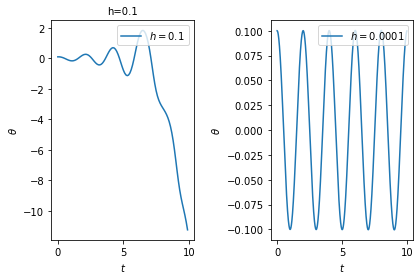

In [4]:
x0 = [0.1, 0]
x_hist1, t_hist1 = pendulum_forward_euler(pendulum_dynamics, x0, 10, 0.1)
x_hist2, t_hist2 = pendulum_forward_euler(pendulum_dynamics, x0, 10, 0.0001)
_, axs = plt.subplots(1,2)
axs[0].plot(t_hist1, x_hist1[0], label=r'$h=0.1$')
axs[0].legend(loc='upper right')

axs[0].set_xlabel(r"$t$")
axs[0].set_ylabel(r"$\theta$")
axs[0].set_title('h=0.1', fontsize=10)
axs[1].plot(t_hist2, x_hist2[0], label=r'$h=0.0001$')
axs[1].legend(loc='upper right')
axs[1].set_xlabel(r"$t$")
axs[1].set_ylabel(r"$\theta$")
plt.tight_layout()
plt.show()

In [5]:
def pendulum_euler_Ad(x0, h):
    g = 9.81
    Ad = np.array([[1, h], [-g * h * math.cos(x0[1]), 1]])
    return Ad

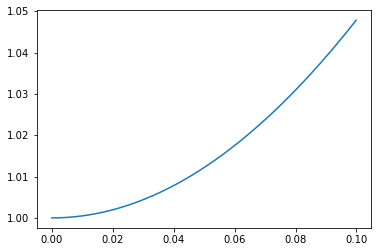

In [6]:
h = np.arange(0, 0.1, 0.0001)
norm_eigval = np.empty_like(h)
for i in range(h.shape[0]):
    Ad = pendulum_euler_Ad([0.1, 0.0], h[i])
    eigval, eigvec = np.linalg.eig(Ad)

    norm_eigval[i] = np.max(abs(eigval))
plt.plot(h, norm_eigval)

In [7]:
def fd_pendulum_rk4(xk, h):
    f1 = pendulum_dynamics(xk)
    f2 = pendulum_dynamics(xk + 0.5*h*f1)
    f3 = pendulum_dynamics(xk + 0.5*h*f2)
    f4 = pendulum_dynamics(xk + h*f3)
    return xk + h * 1.0/6.0 * (f1 + 2 * f2 + 2 * f3 + f4)

In [8]:
def pendulum_rk4(x0, tf, h):
    t_hist = np.arange(0.0, tf, h)
    x_hist = np.zeros([2, t_hist.shape[0]])
    x_hist[:, 0] = x0
    for k in range(x_hist.shape[1] - 1):
        x_hist[:, k + 1] = fd_pendulum_rk4( x_hist[:, k], h)
    return x_hist, t_hist

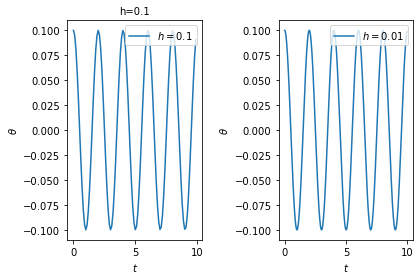

In [9]:
xi = [0.1, 0]
x_hist3, t_hist3 = pendulum_rk4(xi, 10, 0.1)
x_hist4, t_hist4 = pendulum_rk4(xi, 10, 0.01)
_, axs = plt.subplots(1,2)
axs[0].plot(t_hist3, x_hist3[0], label=r'$h=0.1$')
axs[0].legend(loc='upper right')

axs[0].set_xlabel(r"$t$")
axs[0].set_ylabel(r"$\theta$")
axs[0].set_title('h=0.1', fontsize=10)
axs[1].plot(t_hist4, x_hist4[0], label=r'$h=0.01$')
axs[1].legend(loc='upper right')
axs[1].set_xlabel(r"$t$")
axs[1].set_ylabel(r"$\theta$")
plt.tight_layout()
plt.show()

In [10]:
def backward_pendulum_euler(func, x0, tf, h):
    t_hist = np.arange(0.0, tf, h)
    x_hist = np.zeros([2, t_hist.shape[0]])
    x_hist[:, 0] = x0
    for k in range(x_hist.shape[1] - 1) :
        e = 1.0
        x_hist[:,k+1] = x_hist[:,k]
        while e > 1.0e-8:
            xn = x_hist[:, k] + h * func(x_hist[:, k+1])
            e = np.linalg.norm(xn - x_hist[:, k+1])
            x_hist[:, k+1] = xn
    return x_hist, t_hist
    

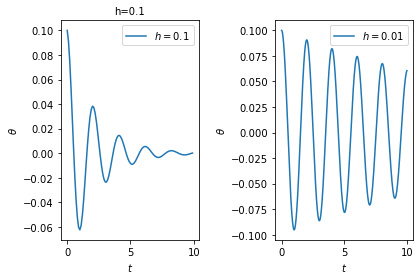

In [11]:
xi = [0.1, 0]
x_hist5, t_hist5 = backward_pendulum_euler(pendulum_dynamics, xi, 10, 0.1)
x_hist6, t_hist6 = backward_pendulum_euler(pendulum_dynamics, xi, 10, 0.01)
_, axs = plt.subplots(1,2)
axs[0].plot(t_hist5, x_hist5[0], label=r'$h=0.1$')
axs[0].legend(loc='upper right')

axs[0].set_xlabel(r"$t$")
axs[0].set_ylabel(r"$\theta$")
axs[0].set_title('h=0.1', fontsize=10)
axs[1].plot(t_hist6, x_hist6[0], label=r'$h=0.01$')
axs[1].legend(loc='upper right')
axs[1].set_xlabel(r"$t$")
axs[1].set_ylabel(r"$\theta$")
plt.tight_layout()
plt.show()